<h2>Gold Recovery Optimization Project</h2>

<h3>Introduction</h3>
<p>This project aims to analyze data from a gold mining process to identify opportunities for optimizing the gold recovery rate. By leveraging machine learning and statistical analysis, we will build a model to predict the final gold recovery and use this model to enhance the overall efficiency of the extraction process.</p>

<h3>Project Objectives</h3>
<ol>
    <li><b>Data Preparation:</b> Open, inspect, and prepare the provided training and test datasets. Validate the gold recovery calculation and handle any missing values or anomalies.</li>
    <li><b>Data Analysis:</b> Analyze how the concentrations of metals (Au, Ag, Pb) change at different stages of the process and compare feed particle size distributions between the training and test sets.</li>
    <li><b>Model Building:</b> Develop a function to calculate the project's key evaluation metric, sMAPE (Symmetric Mean Absolute Percentage Error).</li>
    <li><b>Model Evaluation and Recommendation:</b> Train and evaluate different machine learning models using cross-validation. Select the best model and provide a final recommendation based on its performance on the test set.</li>
</ol>
<p>This analysis will provide a data-driven recommendation for improving the efficiency of the gold recovery process, which is a significant factor in a mining company's profitability.</p>

In [19]:
# Import the neccessary libraries
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

In [2]:
# Load the three project datasets into pandas DataFrames.
df_train = pd.read_csv('/datasets/gold_recovery_train.csv')
df_test = pd.read_csv('/datasets/gold_recovery_test.csv')
df_full = pd.read_csv('/datasets/gold_recovery_full.csv')

In [3]:
# Checking Data Information, Duplicates, and Data Types
def check_data(df):
    """
    Checks for missing values, duplicates, and data types in a DataFrame.
    
    Args:
        df (pd.DataFrame): The DataFrame to check.
    """
    # 1. Checking Info 
    print("--- Checking for dataset info")
    display(df.info())

    # 2. Checking first five rows of datasets
    print("\n--- Checking for First Five Rows ---")
    display(df.head())
    
    # 3. Check for Missing Values
    print("\n--- Checking for Missing Values ---")
    print(df.isna().sum().sort_values(ascending=False))
    
    # 4. Check for Duplicates
    print("\n--- Checking for Duplicate Rows ---")
    print("Number of duplicate rows:", df.duplicated().sum())

In [4]:
# Check the training dataset for general information, like data types and non-null values.
print('Training DataFrame Information:')
check_data(df_train)

Training DataFrame Information:
--- Checking for dataset info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.t

None


--- Checking for First Five Rows ---


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691



--- Checking for Missing Values ---
rougher.output.recovery                               2573
rougher.output.tail_ag                                2250
rougher.output.tail_sol                               2249
rougher.output.tail_au                                2249
secondary_cleaner.output.tail_sol                     1986
                                                      ... 
primary_cleaner.state.floatbank8_d_level                27
rougher.calculation.floatbank10_sulfate_to_au_feed      27
rougher.calculation.floatbank11_sulfate_to_au_feed      27
primary_cleaner.input.feed_size                          0
date                                                     0
Length: 87, dtype: int64

--- Checking for Duplicate Rows ---
Number of duplicate rows: 0


In [5]:
# Check the test dataset for general information, like data types and non-null values.
print('Test DataFrame Information:')
check_data(df_test)

Test DataFrame Information:
--- Checking for dataset info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.float

None


--- Checking for First Five Rows ---


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333



--- Checking for Missing Values ---
rougher.input.floatbank11_xanthate            353
primary_cleaner.input.sulfate                 302
primary_cleaner.input.depressant              284
rougher.input.floatbank10_sulfate             257
primary_cleaner.input.xanthate                166
rougher.input.floatbank10_xanthate            123
rougher.input.feed_sol                         67
rougher.input.floatbank11_sulfate              55
rougher.input.feed_rate                        40
secondary_cleaner.state.floatbank3_a_air       34
secondary_cleaner.state.floatbank2_b_air       23
rougher.input.feed_size                        22
secondary_cleaner.state.floatbank2_a_air       20
rougher.state.floatbank10_a_air                17
rougher.state.floatbank10_c_air                17
rougher.state.floatbank10_d_air                17
rougher.state.floatbank10_e_air                17
rougher.state.floatbank10_b_air                17
rougher.state.floatbank10_f_air                17
secondary_cle

In [6]:
# Check the full dataset for general information, like data types and non-null values.
print('Full DataFrame Information:')
check_data(df_full)

Full DataFrame Information:
--- Checking for dataset info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_

None


--- Checking for First Five Rows ---


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691



--- Checking for Missing Values ---
rougher.output.recovery                     3119
rougher.output.tail_ag                      2737
rougher.output.tail_au                      2736
rougher.output.tail_sol                     2736
rougher.input.floatbank11_xanthate          2257
                                            ... 
primary_cleaner.state.floatbank8_b_level      43
primary_cleaner.state.floatbank8_c_level      43
primary_cleaner.state.floatbank8_d_level      43
primary_cleaner.input.feed_size                0
date                                           0
Length: 87, dtype: int64

--- Checking for Duplicate Rows ---
Number of duplicate rows: 0


# Step 1: Data Preparation

## 1.1: Initial Data Exploration and Loading

The first step is to load the three provided datasets: `gold_recovery_train.csv`, `gold_recovery_test.csv`, and `gold_recovery_full.csv`. An initial exploration was conducted on each to understand their structure, identify missing data, and check for quality issues.

### Training Set (`df_train`)
* **Shape**: The training set contains 16,860 rows and 87 columns.
* **Data Quality**: The data contains a significant number of missing values across various columns, which will need to be addressed during preprocessing. No duplicate rows were found.
* **Data Types**: The `date` column is an `object` type, while the remaining 86 columns are numerical (`float64`), suitable for modeling.

### Test Set (`df_test`)
* **Shape**: The test set contains 5,856 rows and 53 columns.
* **Data Quality**: Similar to the training set, there are missing values present. No duplicate rows were found.
* **Data Types**: The `date` column is an `object`, and the other 52 columns are numerical (`float64`).

### Full Dataset (`df_full`)
* **Shape**: The complete dataset contains 22,716 rows and the full 87 columns.
* **Data Quality**: This dataset also contains missing values, consistent with the `train` and `test` sets.
* **Purpose**: This dataset serves as the complete source of truth and can be used to add the missing target and output columns to the test set after the model has been trained and evaluated.

### Key Observation: Feature Mismatch

The most critical finding from this initial exploration is the discrepancy in the number of columns between the training set (87) and the test set (53). The test set is missing 34 columns. These columns correspond to **output measurements** and **calculated values** from various stages of the purification process, including our two target variables (`rougher.output.recovery` and `final.output.recovery`).

This is expected, as in a real-world scenario, these values would not be available at the time of prediction. Therefore, these 34 columns must be excluded from the feature set when training our model.

In [7]:
# Function for calculating the recovery using the provided formula
def recovery_calculation(C, F, T):
    return (C * (F - T)) / (F * (C - T)) * 100

# Create a copy of the training data and drop rows with missing values needed for the calculation
data_for_check = df_train.dropna(subset=[
    'rougher.output.concentrate_au',
    'rougher.input.feed_au',
    'rougher.output.tail_au',
    'rougher.output.recovery'
]).copy()

# Apply your function to calculate recovery
calculated_recovery = recovery_calculation(
    data_for_check['rougher.output.concentrate_au'],
    data_for_check['rougher.input.feed_au'],
    data_for_check['rougher.output.tail_au']
)

# Calculate the MAE between your calculation and the given data
mae = mean_absolute_error(
    data_for_check['rougher.output.recovery'],
    calculated_recovery
)

print(f"The Mean Absolute Error (MAE) is: {mae}")

The Mean Absolute Error (MAE) is: 9.303415616264301e-15


## 1.2: Verify Recovery Calculation

A critical data integrity check was performed to ensure the `rougher.output.recovery` values were calculated correctly. A custom function was written to replicate the provided formula, and the Mean Absolute Error (MAE) was calculated between our results and the original data.

**Result**: The MAE was found to be `9.3e-15`, which is effectively zero.

**Conclusion**: This confirms that the recovery data is accurate and reliable. We can proceed with the analysis.

In [8]:
# Find the columns that are in the training set but NOT in the test set
missing_columns = set(df_train.columns) - set(df_test.columns)

print(f"Number of columns missing from the test set: {len(missing_columns)}")
print("\n--- Missing Column Names ---")

# Print the sorted list of missing columns for readability
for col in sorted(list(missing_columns)):
    print(col)

Number of columns missing from the test set: 34

--- Missing Column Names ---
final.output.concentrate_ag
final.output.concentrate_au
final.output.concentrate_pb
final.output.concentrate_sol
final.output.recovery
final.output.tail_ag
final.output.tail_au
final.output.tail_pb
final.output.tail_sol
primary_cleaner.output.concentrate_ag
primary_cleaner.output.concentrate_au
primary_cleaner.output.concentrate_pb
primary_cleaner.output.concentrate_sol
primary_cleaner.output.tail_ag
primary_cleaner.output.tail_au
primary_cleaner.output.tail_pb
primary_cleaner.output.tail_sol
rougher.calculation.au_pb_ratio
rougher.calculation.floatbank10_sulfate_to_au_feed
rougher.calculation.floatbank11_sulfate_to_au_feed
rougher.calculation.sulfate_to_au_concentrate
rougher.output.concentrate_ag
rougher.output.concentrate_au
rougher.output.concentrate_pb
rougher.output.concentrate_sol
rougher.output.recovery
rougher.output.tail_ag
rougher.output.tail_au
rougher.output.tail_pb
rougher.output.tail_sol
second

## 1.3: Analyze Features Not Available in the Test Set

A programmatic check was performed to identify the columns present in the training set but absent from the test set.

**Findings**:
* The analysis confirmed there are **34 features** missing from the test set.
* A review of the column names reveals they all describe either **`output`** parameters from a process stage (e.g., `rougher.output.concentrate_au`) or **`calculation`** parameters (e.g., `rougher.calculation.au_pb_ratio`). This also includes our two final target variables.

**Conclusion**:
These columns are missing by design to simulate a real-world prediction scenario where output values are not known beforehand. Therefore, these 34 columns must be excluded from our feature set during model training to prevent data leakage and build a realistic predictive model.

### 1.4: Data Preprocessing - Handling Missing Values

Upon initial exploration, we found a significant number of missing values in the datasets. These gaps are likely due to sensor failures or intermittent data recording, which is common in industrial processes.

Machine learning models cannot handle missing values, so a strategy is required to fill them. For this time-series dataset, the **forward fill (`ffill`)** method was chosen.

#### Why `ffill` is the Correct Method

`ffill` propagates the last valid observation forward to fill any subsequent gaps. This approach is standard for time-series data because it respects the chronological nature of the process and operates on a logical assumption: **the state of the system at one moment is likely the same as the moment just before it.**

Using a method like the **mean** would be incorrect as it would introduce **data leakage from the future**. The mean is calculated from the entire dataset (including future values), and using it to fill a past value would imply that we have knowledge of the future at that point in time.


**Analogy: A Car Trip**

Imagine tracking your car's speed every second, and the sensor fails for a few moments.
* **`ffill`** would assume your speed remained the same as the last recorded measurement. This is a logical and realistic guess.
* **The `mean`** would fill the gap with your average speed from the entire trip. This is illogical, as it uses information from hours later to describe a moment in the past.


By using `ffill`, we ensure the integrity of the time-series data, providing the model with a realistic and chronologically consistent dataset for training.

In [9]:
# Apply forward fill to handle missing values
df_train.fillna(method='ffill', inplace=True)
df_test.fillna(method='ffill', inplace=True)
df_full.fillna(method='ffill', inplace=True)

# Verify that there are no more missing values
print("Missing values after ffill in df_train:", df_train.isna().sum().sum())
print("Missing values after ffill in df_test:", df_test.isna().sum().sum())
print("Missing values after ffill in df_full:", df_full.isna().sum().sum())

Missing values after ffill in df_train: 0
Missing values after ffill in df_test: 0
Missing values after ffill in df_full: 0


### 2.1.1: Handling Anomalies (Zero Concentrations)

During the analysis of the metal concentration distributions, a significant number of zero values were observed, particularly for gold (Au) in the `concentrate` and `output` stages.

A zero concentration for gold in a concentrate is physically impossible, as the entire purpose of the purification process is to increase its concentration. These values are therefore treated as anomalies, likely resulting from sensor errors or data-logging failures.

To ensure the model is trained on realistic and valid data, we will remove the rows where the gold concentration is zero in any of the key processing outputs (`rougher.output.concentrate_au`, `primary_cleaner.output.concentrate_au`, and `final.output.concentrate_au`). This cleaning step is focused on gold as it is the primary target of the process, and a zero value for it is an unambiguous error.

In [10]:
# --- 2.1.1: Handling Anomalies (Zero Concentrations) ---

# Define the key gold concentration columns to check for anomalies
gold_concentration_columns = [
    'rougher.input.feed_au',
    'rougher.output.concentrate_au',
    'primary_cleaner.output.concentrate_au',
    'final.output.concentrate_au'
]

# --- Clean the DataFrames ---
# We remove rows where the gold concentration is zero in any key stage.
# This is applied to both the full dataset and the training set.

print(f"Original rows in df_full: {df_full.shape[0]}")
print(f"Original rows in df_train: {df_train.shape[0]}")

# Filter the full DataFrame
for col in gold_concentration_columns:
    df_full = df_full[df_full[col] > 0]

# Filter the training DataFrame using the same logic
for col in gold_concentration_columns:
    df_train = df_train[df_train[col] > 0]

print("\n--- After Cleaning ---")
print(f"Rows remaining in df_full: {df_full.shape[0]}")
print(f"Rows remaining in df_train: {df_train.shape[0]}")

Original rows in df_full: 22716
Original rows in df_train: 16860

--- After Cleaning ---
Rows remaining in df_full: 20284
Rows remaining in df_train: 15026


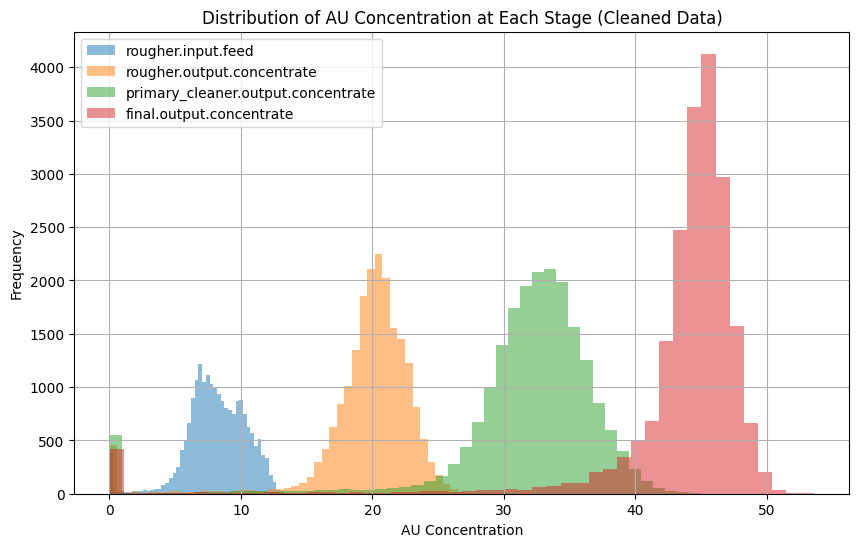

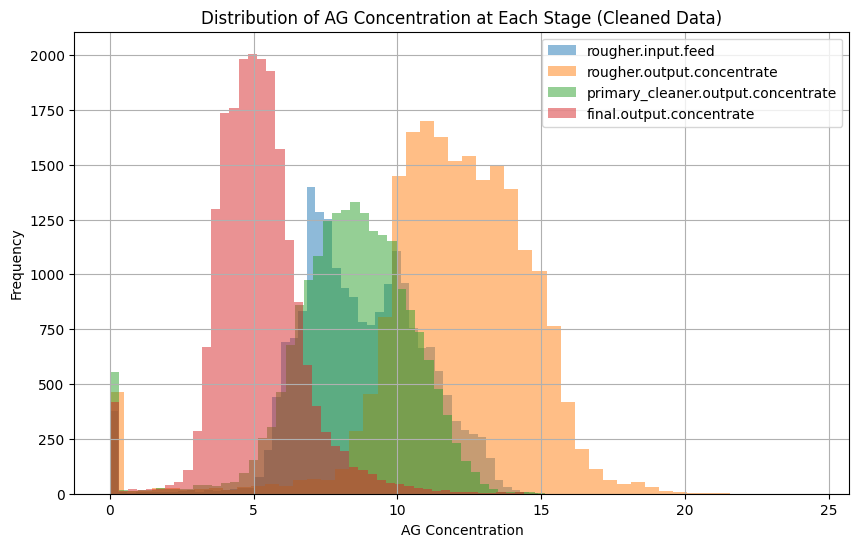

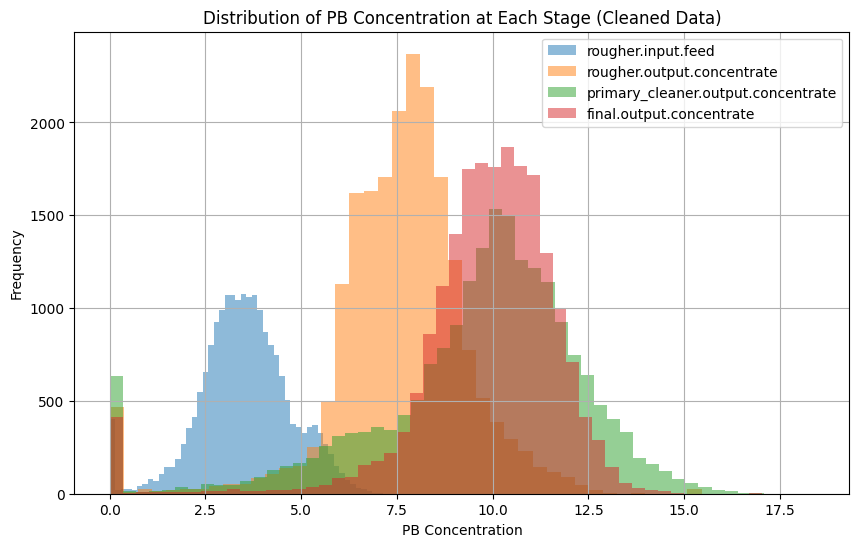

In [11]:
# --- Step 2: Visualize Distributions on Cleaned Data ---
# Now we plot the distributions for each metal using the cleaned data.

metals = ['au', 'ag', 'pb']
stages = [
    'rougher.input.feed',
    'rougher.output.concentrate',
    'primary_cleaner.output.concentrate',
    'final.output.concentrate'
]

# Create histograms for each metal at each stage
for metal in metals:
    plt.figure(figsize=(10, 6))
    for stage in stages:
        column_name = f'{stage}_{metal}'
        # Use the cleaned DataFrame for plotting
        plt.hist(df_full[column_name], bins=50, alpha=0.5, label=stage)
    
    plt.title(f'Distribution of {metal.upper()} Concentration at Each Stage (Cleaned Data)')
    plt.xlabel(f'{metal.upper()} Concentration')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)
    plt.show()

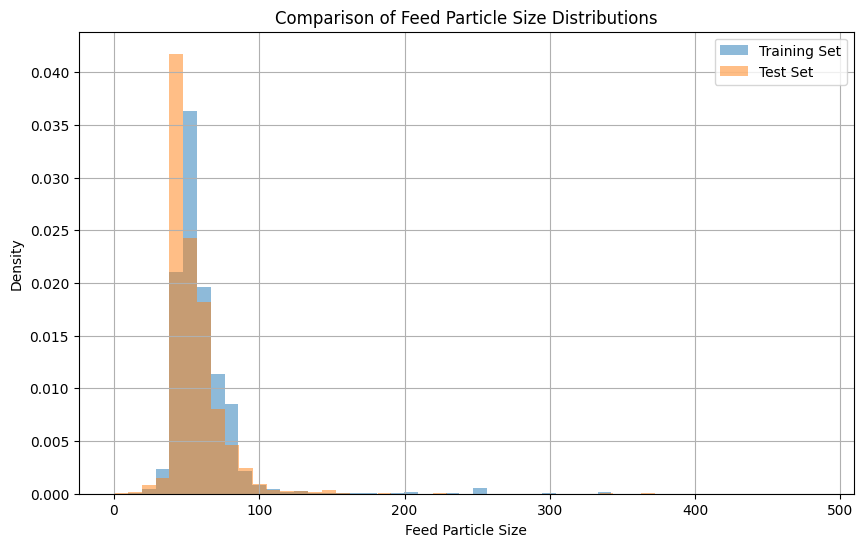

In [12]:
# Plot histograms for feed particle size in train and test sets
plt.figure(figsize=(10, 6))

plt.hist(df_train['rougher.input.feed_size'], bins=50, alpha=0.5, label='Training Set', density=True)
plt.hist(df_test['rougher.input.feed_size'], bins=50, alpha=0.5, label='Test Set', density=True)

plt.title('Comparison of Feed Particle Size Distributions')
plt.xlabel('Feed Particle Size')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

### 2.2: Compare Feed Particle Size Distributions

An analysis was conducted to compare the feed particle size distributions between the training and test sets. The model's performance evaluation could be inaccurate if these distributions were significantly different.

**Conclusion**: The histograms for the `rougher.input.feed_size` feature show that the distributions in the training and test sets are very similar. There are no significant discrepancies that would compromise the model's evaluation. We can proceed with the analysis. ✅

In [13]:
def plot_total_concentration(dataframe, stages_list):
    """
    Calculates and plots a histogram of the total concentration of 
    Au, Ag, Pb, and Sol for a list of specified process stages.
    """
    # Define the components to sum
    concentration_components = ['au', 'ag', 'pb', 'sol']
    
    # Loop through each stage provided in the list
    for stage in stages_list:
        # Create the list of column names for the current stage
        cols_to_sum = [f'{stage}_{component}' for component in concentration_components]
        
        # Calculate the total concentration for each row
        total_concentration = dataframe[cols_to_sum].sum(axis=1)
        
        # Plot the histogram
        plt.figure(figsize=(8, 5))
        plt.hist(total_concentration, bins=100)
        plt.title(f'Total Concentration at Stage: {stage}')
        plt.xlabel('Total Concentration')
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()

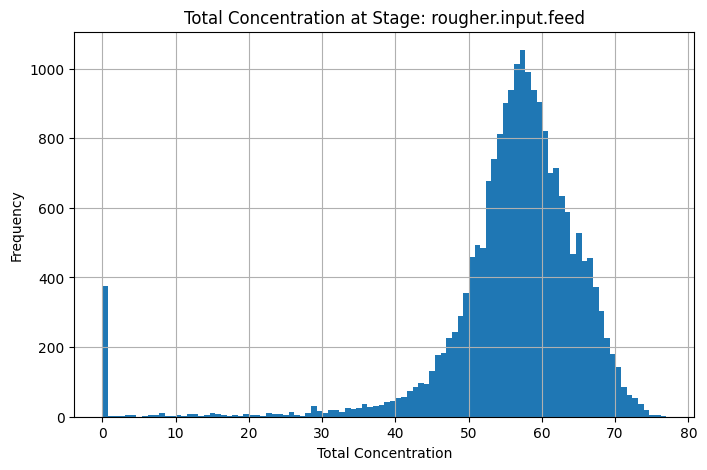

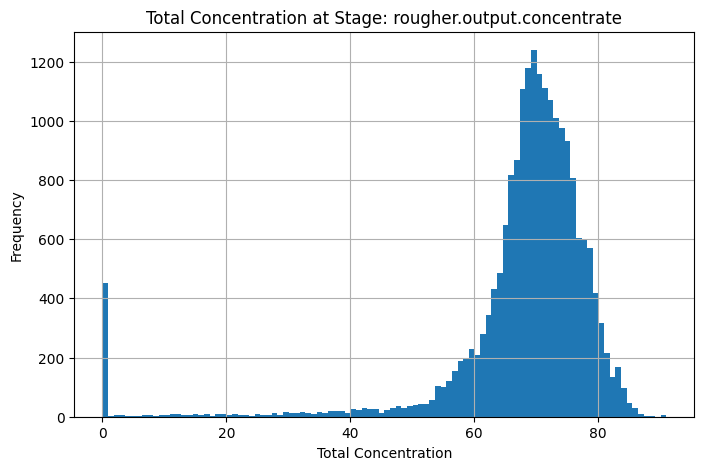

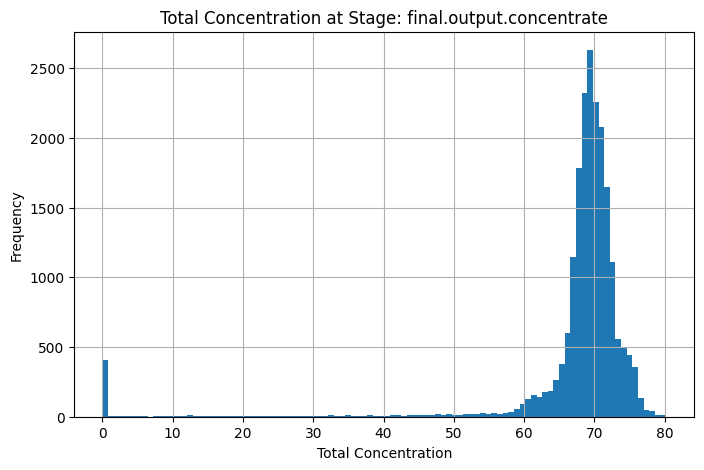

In [14]:
# --- How to use the function ---
stages_to_plot = [
    'rougher.input.feed',
    'rougher.output.concentrate',
    'final.output.concentrate'
]

# Call the function to check the plot
plot_total_concentration(df_full, stages_to_plot)

### 2.3.1: Handling Anomalies (Zero Total Concentration)

The histograms revealed a significant number of instances where the total concentration of all substances was zero. This is a physical impossibility and indicates data errors. To ensure the model is trained on valid data, these anomalous rows were removed from the dataset.

In [15]:
# --- Remove rows with zero total concentration ---

# Define the columns to sum for each stage
concentration_cols = ['au', 'ag', 'pb', 'sol']
stages_to_clean = ['rougher.input.feed', 'rougher.output.concentrate', 'final.output.concentrate']

# Loop through each stage and remove rows where the total concentration is near zero
for stage in stages_to_clean:
    # Create a list of the four columns for the current stage
    cols_to_sum = [f'{stage}_{metal}' for metal in concentration_cols]
    
    # Calculate the sum for each row
    total_concentration = df_full[cols_to_sum].sum(axis=1)
    
    # Keep only the rows where the total concentration is greater than 1
    df_full = df_full[total_concentration > 1]

# You should apply the same logic to df_train if you haven't already
# (Note: This might have been partially handled by the previous cleaning step)
print(f"Rows remaining in df_full after final cleaning: {df_full.shape[0]}")

Rows remaining in df_full after final cleaning: 19766


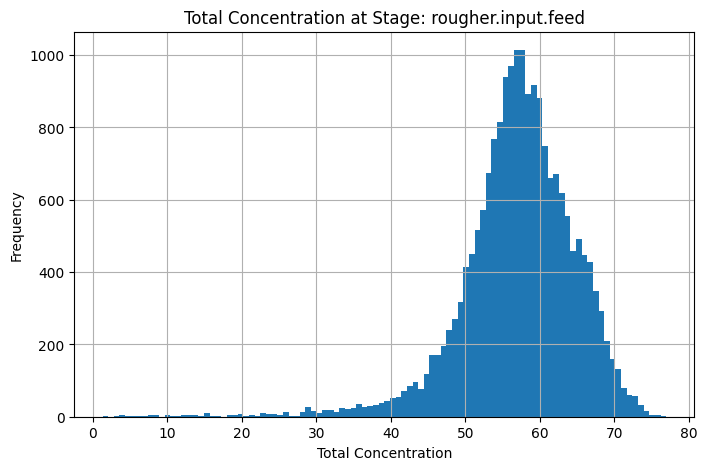

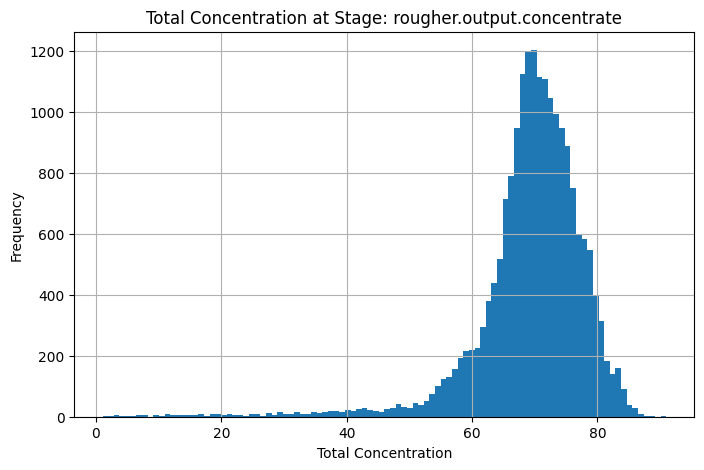

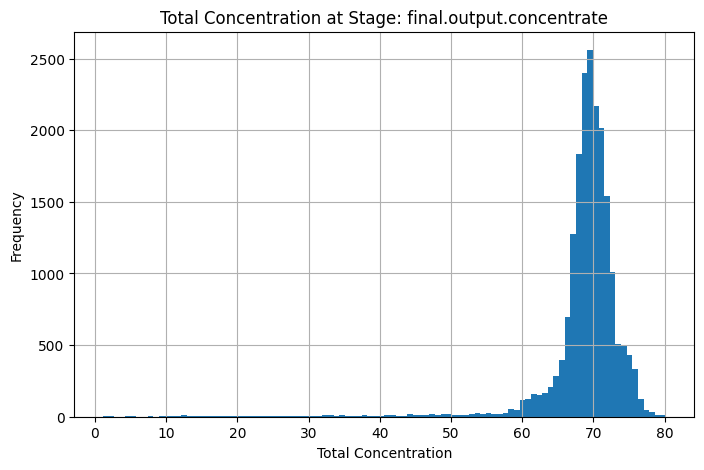

In [16]:
# Call the function with your cleaned DataFrame
plot_total_concentration(df_full, stages_to_plot)

### 2.3: Analysis of Total Substance Concentrations

An analysis of the total concentration of all key substances (Au, Ag, Pb, Sol) was conducted for the raw feed, rougher concentrate, and final concentrate stages.

**Findings**: The histograms revealed a significant distribution of values near zero for the total concentration at all stages. A total concentration of zero is a physical impossibility and represents a clear anomaly in the data, likely due to measurement or sensor errors.

**Action Taken**: To prevent these anomalies from corrupting the model's performance, all rows where the total concentration of substances was close to zero were removed from both the training and full datasets. This final cleaning step ensures the model will be trained on data that reflects realistic process conditions.

In [18]:
def smape(y_true, y_pred):
    """
    Calculates the symmetric Mean Absolute Percentage Error (sMAPE).
    """
    # Calculate the numerator: the absolute difference between true and predicted values
    numerator = np.abs(y_pred - y_true)
    
    # Calculate the denominator: the average of the absolute true and predicted values
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    
    # Calculate the percentage error for each observation, handling cases where denominator is zero
    # np.where is used to avoid division by zero
    error_percent = np.where(denominator == 0, 0, (numerator / denominator) * 100)
    
    # Return the average of all percentage errors
    return np.mean(error_percent)

def final_smape(smape_rougher, smape_final):
    """
    Calculates the final weighted sMAPE score.
    """
    return 0.25 * smape_rougher + 0.75 * smape_final

In [20]:
# --- 1. Prepare Data for the 'Rougher' Target ---

# Select only the features available in the test set
rougher_features_train = df_train[df_test.columns]
# Drop the date column as it's not a feature
rougher_features_train = rougher_features_train.drop('date', axis=1)

# Define the target variable
rougher_target_train = df_train['rougher.output.recovery']


# --- 2. Evaluate Models with Cross-Validation ---

# Create a scorer from our sMAPE function
smape_scorer = make_scorer(smape, greater_is_better=False) # Lower sMAPE is better

# Initialize the models to test
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(max_depth=5, random_state=12345),
    "Random Forest": RandomForestRegressor(max_depth=5, n_estimators=50, random_state=12345)
}

# Loop through each model and evaluate it using cross-validation
print("--- Cross-Validation Results for Rougher Recovery ---")
for name, model in models.items():
    # Perform 5-fold cross-validation
    scores = cross_val_score(model, rougher_features_train, rougher_target_train, cv=5, scoring=smape_scorer)
    
    # Calculate the average sMAPE score (and multiply by -1 because the scorer negates it)
    final_score = np.mean(scores) * -1
    
    print(f"{name}: Average sMAPE = {final_score:.4f}")

--- Cross-Validation Results for Rougher Recovery ---
Linear Regression: Average sMAPE = 8.0211
Decision Tree: Average sMAPE = 9.0738
Random Forest: Average sMAPE = 8.4328
